In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [22]:
file_path = "acm.txt"

titles = []
authors = []
years = []
conferences = []
indices = []
citations = []

with open(file_path, 'r', encoding='utf-8') as file:
    current_record = {}
    citation_list = []
    for line in file:
        line = line.strip()
        if line.startswith('#*'):
            current_record['title'] = line[2:]
        elif line.startswith('#@'):
            current_record['authors'] = line[2:]
        elif line.startswith('#t'):
            current_record['year'] = line[2:]
        elif line.startswith('#c'):
            current_record['conference'] = line[2:]
        elif line.startswith('#index'):
            current_record['index'] = line[6:]
        elif line.startswith('#%'):
            citation_list.append(line[2:])
        elif line == '':  
            if current_record:
                titles.append(current_record.get('title', ''))
                authors.append(current_record.get('authors', ''))
                years.append(current_record.get('year', ''))
                conferences.append(current_record.get('conference', ''))
                indices.append(current_record.get('index', ''))
                citations.append(citation_list.copy()) 
                current_record = {}
                citation_list = []

In [23]:
df = pd.DataFrame({
    'Title': titles,
    'Authors': authors,
    'Year': years,
    'Conference': conferences,
    'Index': indices,
    'Citations': citations
})

df['Num_Citations'] = df['Citations'].apply(len)
df['Conference'] = df['Conference'].str.replace(r'[^\w\s,]', '', regex=True)


In [24]:
df['Conference'] = df['Conference'].str.strip().str.lower()

# Compute distinct counts
all_authors = df['Authors'].str.split(', ').explode()
distinct_authors = all_authors.dropna().nunique()
distinct_venues = df['Conference'].nunique()
distinct_publications = df['Title'].nunique()

In [25]:
all_citations = [item for sublist in df['Citations'] for item in sublist]
distinct_citations = len(set(all_citations))

Question 1

In [26]:
print(f"Distinct Authors: {distinct_authors}")
print(f"Distinct Publication Venues: {distinct_venues}")
print(f"Distinct Publications: {distinct_publications}")
print(f"Distinct Citations/References: {distinct_citations}")

Distinct Authors: 1658465
Distinct Publication Venues: 268693
Distinct Publications: 2183552
Distinct Citations/References: 1007495


Question 2

In [27]:
target_conference = "principles and practice of knowledge discovery in databases"
filtered_conferences = df[df['Conference'].str.contains(target_conference, na=False)]

print(f"Total Records for '{target_conference}': {filtered_conferences.shape[0]}")


Total Records for 'principles and practice of knowledge discovery in databases': 212


Question 3

In [28]:
author_publication_counts = defaultdict(int)

for author_list in authors:
    for author in author_list.split(','):
        author = author.strip()  # Remove extra spaces
        if author:  # Ensure non-empty author name
            author_publication_counts[author] += 1


In [29]:
author_names = list(author_publication_counts.keys())
publication_counts = list(author_publication_counts.values())

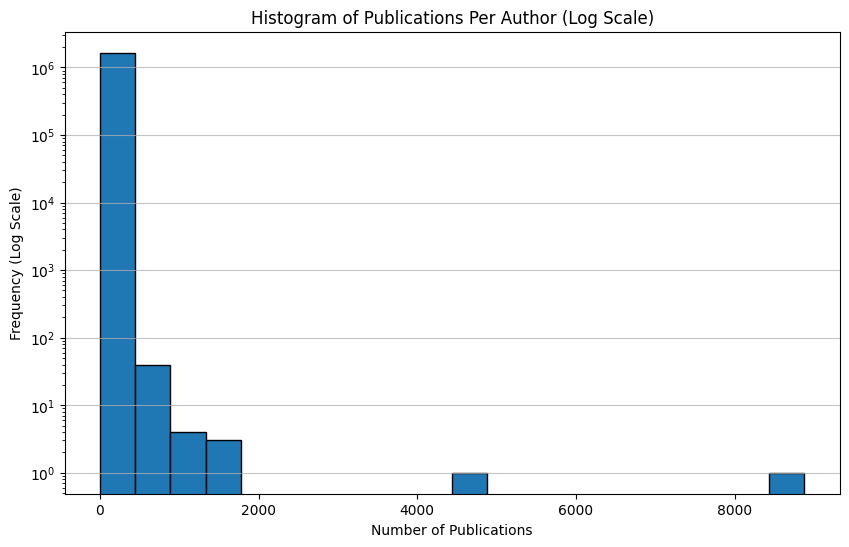

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(publication_counts, bins=20, log=True, edgecolor='black')
plt.title("Histogram of Publications Per Author (Log Scale)")
plt.xlabel("Number of Publications")
plt.ylabel("Frequency (Log Scale)")
plt.grid(axis='y', alpha=0.75)

# Show plot
plt.show()

Question 4

In [31]:
mean = np.mean(publication_counts)
std_dev = np.std(publication_counts)
q1 = np.percentile(publication_counts, 25)
median = np.percentile(publication_counts, 50)
q3 = np.percentile(publication_counts, 75)

In [32]:
print(f"Mean number of publications per author: {mean:.2f}")
print(f"Standard deviation: {std_dev:.2f}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")


Mean number of publications per author: 3.46
Standard deviation: 12.77
1st Quartile (Q1): 1.0
Median (Q2): 1.0
3rd Quartile (Q3): 3.0


Question 5

In [33]:
venue_publication_counts = df['Conference'].value_counts()
mean_venue_publications = venue_publication_counts.mean()
std_dev_venue_publications = venue_publication_counts.std()
q1_venue = np.percentile(venue_publication_counts, 25)
q2_venue = np.percentile(venue_publication_counts, 50)  # Median
q3_venue = np.percentile(venue_publication_counts, 75)

max_venue = venue_publication_counts.idxmax()
max_venue_count = venue_publication_counts.max()

In [34]:
print(f"Mean Number of Publications per Venue: {mean_venue_publications:.2f}")
print(f"Standard Deviation: {std_dev_venue_publications:.2f}")
print(f"Q1 (1st Quartile): {q1_venue:.2f}")
print(f"Q2 (Median): {q2_venue:.2f}")
print(f"Q3 (3rd Quartile): {q3_venue:.2f}")
print(f"Venue with the largest number of publications: '{max_venue}' with {max_venue_count} publications.")

Mean Number of Publications per Venue: 8.88
Standard Deviation: 107.79
Q1 (1st Quartile): 1.00
Q2 (Median): 1.00
Q3 (3rd Quartile): 1.00
Venue with the largest number of publications: 'ieee transactions on information theory' with 12754 publications.


In [35]:
# plt.figure(figsize=(10, 6))
# venue_publication_counts.plot(kind='bar', color='skyblue')
# plt.xlabel("Venue")
# plt.ylabel("Number of Publications (Log Scale)")
# plt.title("Histogram of Publications per Venue")
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

Question 6

In [39]:
df['Conference'] = df['Conference'].str.strip().str.lower()
df['References'] = df['Citations'].apply(len)

1
2
3
4
5


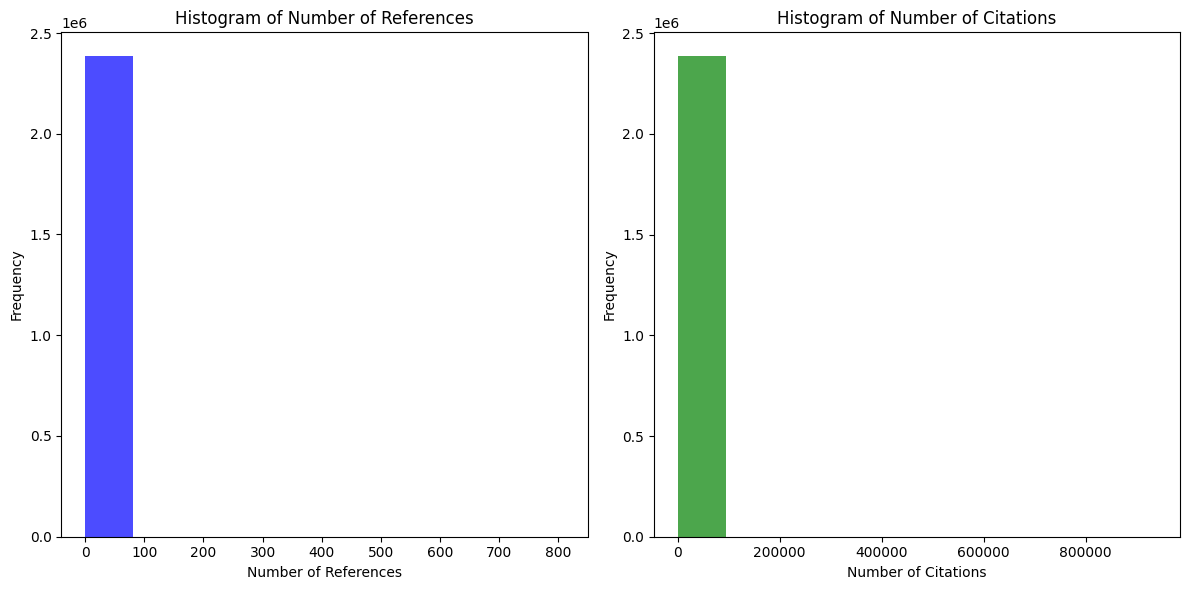

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Num_References'] = df['Citations'].apply(len)
plt.hist(df['Num_References'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Number of References')
plt.xlabel('Number of References')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
citation_count = defaultdict(int)
for citation_list in df['Citations']:
    for cited in citation_list:
        citation_count[cited] += 1

df['Num_Citations'] = df['Index'].map(lambda idx: citation_count.get(idx, 0))
plt.hist(df['Num_Citations'], bins=10, color='green', alpha=0.7)
plt.title('Histogram of Number of Citations')
plt.xlabel('Number of Citations')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [43]:
max_references = df['Num_References'].max()
largest_references_pub = df.loc[df['Num_References'].idxmax()]

# Finding the publication with the largest number of citations
max_citations = df['Num_Citations'].max()
largest_citations_pub = df.loc[df['Num_Citations'].idxmax()]

In [44]:
print("Publication with the largest number of references:")
print(f"Title: {largest_references_pub['Title']}")
print(f"Number of References: {max_references}")

print("\nPublication with the largest number of citations:")
print(f"Title: {largest_citations_pub['Title']}")
print(f"Number of Citations: {max_citations}")

Publication with the largest number of references:
Title: Proceedings of the Twenty-Fourth ACM Symposium on Operating Systems Principles
Number of References: 809

Publication with the largest number of citations:
Title: INFORMS Journal on Computing
Number of Citations: 938039


Question 7

In [45]:
venue_stats = (
    df.groupby('Conference')
    .agg(
        Total_Citations=('Num_Citations', 'sum'),
        Num_Publications=('Conference', 'count')
    )
)

# Calculate the impact factor
venue_stats['Impact_Factor'] = venue_stats['Total_Citations'] / venue_stats['Num_Publications']


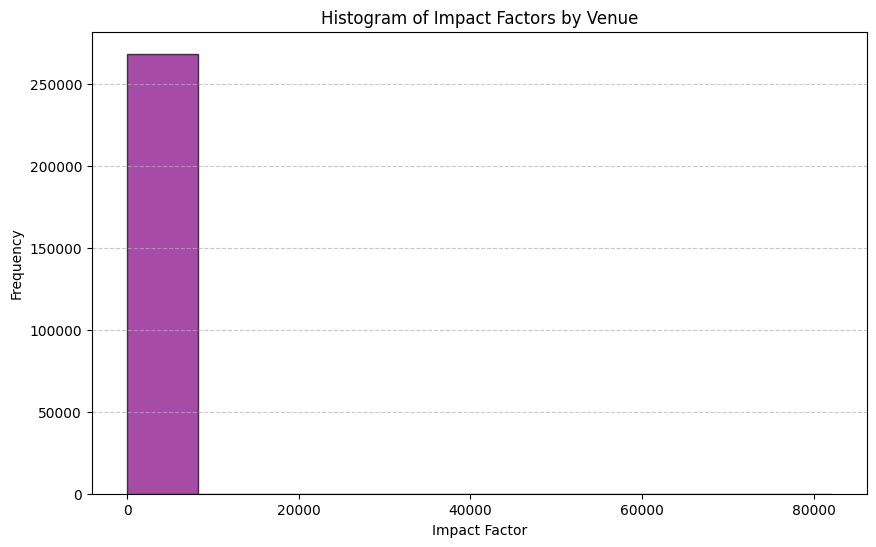

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(venue_stats['Impact_Factor'], bins=10, color='purple', alpha=0.7, edgecolor='black')
plt.title('Histogram of Impact Factors by Venue')
plt.xlabel('Impact Factor')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [52]:
highest_impact_venue = venue_stats.loc[venue_stats['Impact_Factor'].idxmax()]

print("Venue with the highest apparent impact factor:")
print(f"Venue: {highest_impact_venue.name}")
print(f"Impact Factor: {highest_impact_venue['Impact_Factor']}")
print(f"Total Citations: {highest_impact_venue['Total_Citations']}")
print(f"Number of Publications: {highest_impact_venue['Num_Publications']}")


Venue with the highest apparent impact factor:
Venue: ai edam
Impact Factor: 82080.0
Total Citations: 82080.0
Number of Publications: 1.0


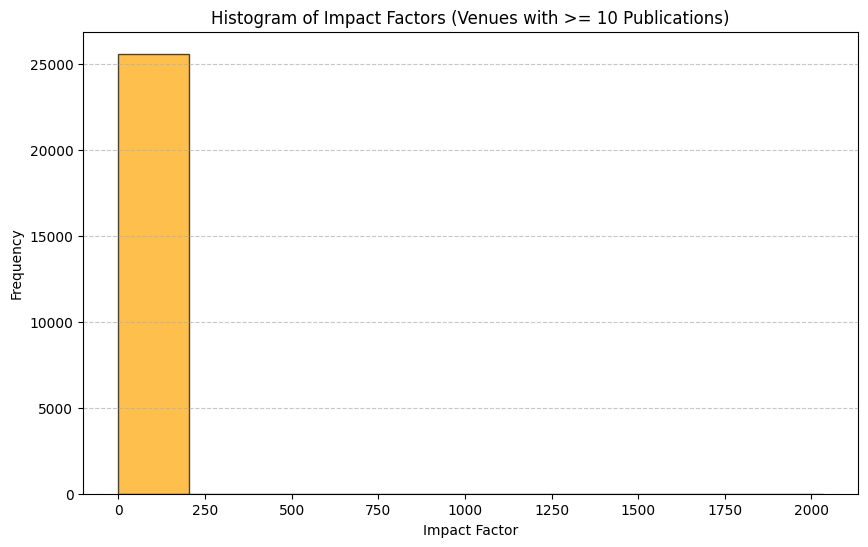

In [53]:
filtered_venue_stats = venue_stats[venue_stats['Num_Publications'] >= 10]
plt.figure(figsize=(10, 6))
plt.hist(filtered_venue_stats['Impact_Factor'], bins=10, color='orange', alpha=0.7, edgecolor='black')
plt.title('Histogram of Impact Factors (Venues with >= 10 Publications)')
plt.xlabel('Impact Factor')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [54]:
highest_filtered_impact_venue = filtered_venue_stats.loc[filtered_venue_stats['Impact_Factor'].idxmax()]
venue_name = highest_filtered_impact_venue.name

print("Venue with the highest impact factor (filtered):")
print(f"Venue: {venue_name}")
print(f"Impact Factor: {highest_filtered_impact_venue['Impact_Factor']}")
print(f"Total Citations: {highest_filtered_impact_venue['Total_Citations']}")
print(f"Number of Publications: {highest_filtered_impact_venue['Num_Publications']}")

# List citation counts for all publications in the highest impact factor venue
citations_in_highest_impact_venue = df[df['Conference'] == venue_name]['Num_Citations']
print("\nCitation counts for all publications in this venue:")
print(citations_in_highest_impact_venue.tolist())

# Compare impact factor (mean) to median citations
mean_citations = citations_in_highest_impact_venue.mean()
median_citations = citations_in_highest_impact_venue.median()

print(f"\nMean (Impact Factor): {mean_citations}")
print(f"Median Citations: {median_citations}")

Venue with the highest impact factor (filtered):
Venue: proceedings of the 19th acm sigkdd international conference on knowledge discovery and data mining
Impact Factor: 2033.2029702970297
Total Citations: 410707.0
Number of Publications: 202.0

Citation counts for all publications in this venue:
[9, 3, 1, 0, 0, 10, 0, 2, 0, 1, 0, 0, 0, 5, 0, 1, 1, 2, 3, 3, 1, 3, 1, 1, 2, 1, 0, 1, 0, 3, 0, 2, 8, 1, 3, 0, 0, 0, 1, 1, 1, 4, 0, 5, 1, 0, 0, 5, 4, 3, 0, 1, 0, 1, 1, 7, 1, 1, 1, 0, 3, 0, 2, 6, 2, 2, 2, 4, 5, 5, 2, 0, 9, 1, 3, 2, 0, 1, 3, 0, 1, 3, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 6, 0, 3, 1, 1, 15, 1, 1, 2, 3, 4, 2, 4, 3, 0, 4, 0, 3, 2, 2, 1, 4, 10, 2, 0, 0, 2, 4, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 4, 2, 0, 1, 0, 1, 0, 0, 5, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 8, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 82080, 82080, 82080, 82080, 82080]

Mean (Impact Factor): 2033.2029702970297
Median Citations: 1.0


In [55]:
yearly_stats = df.groupby('Year').agg(
    Avg_References=('Num_References', 'mean'),
    Avg_Citations=('Num_Citations', 'mean')
).reset_index()

# Convert Year to numeric for sorting (if it's not already)
yearly_stats['Year'] = pd.to_numeric(yearly_stats['Year'])

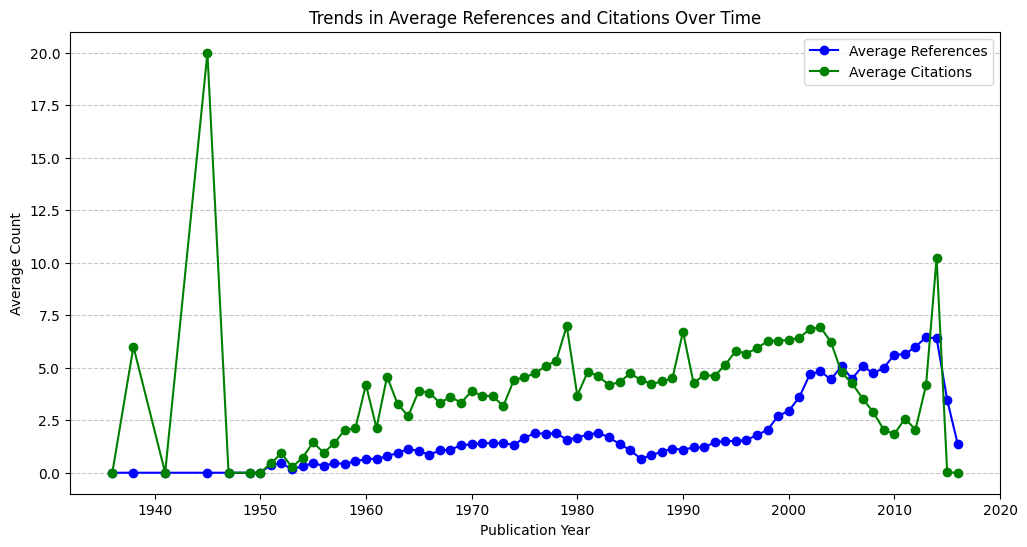

Yearly Averages:
      Year  Avg_References  Avg_Citations
0      NaN        1.267679       0.225795
1   1936.0        0.000000       0.000000
2   1938.0        0.000000       6.000000
3   1941.0        0.000000       0.000000
4   1945.0        0.000000      20.000000
..     ...             ...            ...
69  2012.0        6.004628       2.055771
70  2013.0        6.443356       4.169791
71  2014.0        6.402448      10.236768
72  2015.0        3.469708       0.012592
73  2016.0        1.357594       0.000332

[74 rows x 3 columns]


In [56]:
plt.figure(figsize=(12, 6))

# Plot average references
plt.plot(yearly_stats['Year'], yearly_stats['Avg_References'], label='Average References', marker='o', color='blue')

# Plot average citations
plt.plot(yearly_stats['Year'], yearly_stats['Avg_Citations'], label='Average Citations', marker='o', color='green')

plt.title('Trends in Average References and Citations Over Time')
plt.xlabel('Publication Year')
plt.ylabel('Average Count')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display trends in numbers
print("Yearly Averages:")
print(yearly_stats)